In [2]:
with open('201511291739-Copy1.dat') as f:
    lines = f.readlines()
b = list()
print("number of data points are", len(lines))
for i, l in enumerate(lines):
    a = [float(x) for x in l.strip().split(' ')]
    #print(a)
    alt_diff = a[3] - a[1]
    az_diff = a[2] - a[0]
    a.extend([alt_diff, az_diff]) # diff is observed - catalogue (left catalogue, right observed)
    b.append(a)

number of data points are 61


In [7]:
with open('trainingset.csv', 'w') as f:
    print("catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff", file=f)
    for i, row in enumerate(b):
        print(','.join([str(entry) for entry in row]), file=f)
        if i ==40:
            break
print('saved training file')
with open('testset.csv', 'w') as f:
    print("catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff", file=f)
    for row in b[41:]:
        print(','.join([str(entry) for entry in row]), file=f)
print('saved test file')

saved training file
saved test file


In [8]:
import pandas as pd
df = pd.read_csv('trainingset.csv')
df.head()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
0,321.943317,65.140715,322.798050,65.123063,-0.017652,0.854733
1,299.520591,61.034865,300.371422,61.022245,-0.012620,0.850831
2,313.308741,51.468686,314.147220,51.451696,-0.016990,0.838479
3,290.584998,51.775686,291.424639,51.764533,-0.011153,0.839641
4,280.146706,40.100441,280.977860,40.091546,-0.008895,0.831154


In [9]:
df.shape
df.dtypes
import matplotlib.pyplot as plt
import numpy as np

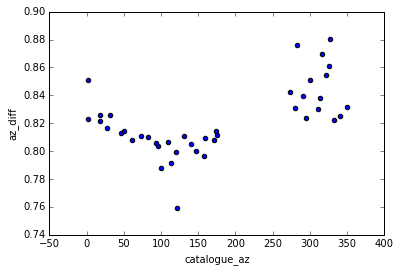

In [11]:
df.plot.scatter(x='catalogue_az', y='az_diff')
plt.show()

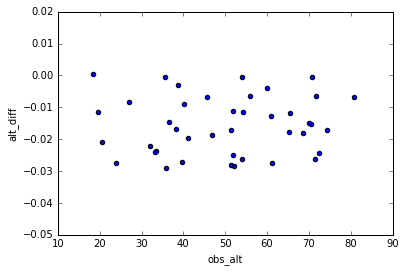

In [59]:
df.plot.scatter(x='obs_alt', y='alt_diff')
plt.show()

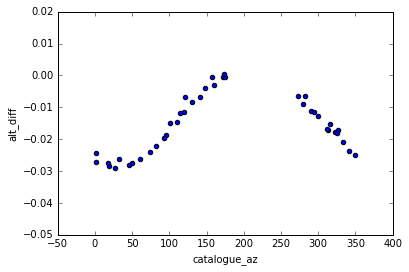

In [52]:
df.plot.scatter(x='catalogue_az', y='alt_diff')
plt.show()

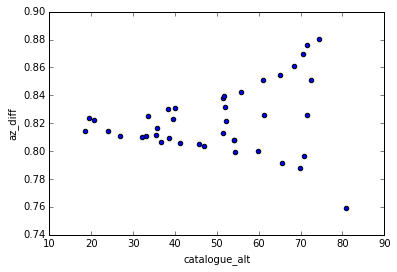

In [53]:
df.plot.scatter(x='catalogue_alt', y='az_diff')
plt.show()

In [65]:
df.describe()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,172.561444,49.920428,173.383596,49.904817,-0.015611,0.822152
std,115.863462,16.977601,115.876888,16.978053,0.009070,0.024621
min,1.110432,18.389042,1.961796,18.389464,-0.029158,0.759347
25%,82.249012,36.674050,83.059016,36.659356,-0.024052,0.807679
50%,147.133974,51.775686,147.933937,51.764533,-0.016859,0.816589
75%,294.893625,65.140715,295.717277,65.123063,-0.008445,0.831450
max,349.392101,80.745721,350.223551,80.738942,0.000422,0.880618


In [12]:
df.corr()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
catalogue_az,1.000000,0.024698,1.000000,0.024871,0.325689,0.545227
catalogue_alt,0.024698,1.000000,0.024742,1.000000,0.049611,0.218616
obs_az,1.000000,0.024742,1.000000,0.024915,0.325617,0.545376
obs_alt,0.024871,1.000000,0.024915,1.000000,0.050144,0.218524
alt_diff,0.325689,0.049611,0.325617,0.050144,1.000000,-0.161170
az_diff,0.545227,0.218616,0.545376,0.218524,-0.161170,1.000000


In [13]:
from sklearn import linear_model, metrics

In [14]:
X1 = -1.0/np.cos(np.radians(list(df['catalogue_alt'])))
X2 = -1.0*np.tan(np.radians(list(df['catalogue_alt'])))
X3 = -1.0*np.cos(np.radians(list(df['catalogue_az']))) * np.tan(np.radians(list(df['catalogue_alt'])))
X4 = np.sin(np.radians(list(df['catalogue_az']))) * np.tan(np.radians(list(df['catalogue_alt'])))
X = np.array([X1, X2, X3, X4])
X = X.T
print(X.shape)
df2 = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4'])
df2.head()

(41, 4)


,X1,X2,X3,X4
0,2.378737,2.158330,1.699472,-1.330483
1,2.064933,1.806640,0.890197,-1.572099
2,1.605285,1.255763,0.861365,-0.913779
3,1.616183,1.269664,0.446410,-1.188598
4,1.307332,0.842091,0.148351,-0.828921


In [17]:
df.head()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
0,321.943317,65.140715,322.798050,65.123063,-0.017652,0.854733
1,299.520591,61.034865,300.371422,61.022245,-0.012620,0.850831
2,313.308741,51.468686,314.147220,51.451696,-0.016990,0.838479
3,290.584998,51.775686,291.424639,51.764533,-0.011153,0.839641
4,280.146706,40.100441,280.977860,40.091546,-0.008895,0.831154


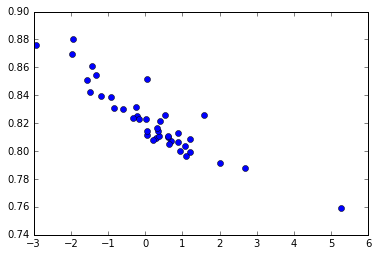

In [61]:
plt.plot(X4, df.az_diff, 'bo')
plt.show()

In [76]:
y = np.array(df.az_diff)
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predicted_training = regr.predict(X)

In [69]:
regr.coef_

array([ 0.01365292, -0.00605526,  0.0065326 , -0.01395032])

In [70]:
regr.intercept_

0.80550732669946234

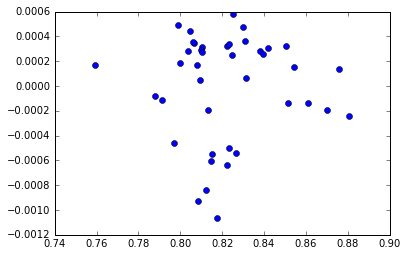

In [80]:
plt.plot(y_predicted_training, y - y_predicted_training, 'bo')
plt.show()

In [74]:
regr.score(X, y) # Gives R^2 (no easy way in sklearn for p-value and F-statistic)

0.99970326380150731

In [85]:
RSS = np.sum(np.square(y - y_predicted_training))
regr.residues_

/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


7.1952380308752216e-06

In [88]:
RSE = np.sqrt(RSS/(41-4-1)) # RSE = sqrt(RSS/(n-p-1))
print(RSE)

0.000447065680946


In [89]:
metrics.r2_score(y, y_predicted_training)~

0.99970326380150731

In [90]:
from sklearn import feature_selection
feature_selection.f_regression(X,y)

(array([  8.89595292e-02,   2.14035921e-01,   6.29890538e+01,
          1.78607648e+02]),
 array([  7.67087420e-01,   6.46193337e-01,   1.15052137e-09,
          3.84893405e-16]))

In [93]:
TSS = np.sum(np.square(y-np.mean(y)))
f_stat = ((TSS-RSS)/4)/(RSS/(41-4-1))
print(f_stat)

30320.9700061


RSS is :  7.64280362542e-06
RSE is :  0.000460760350623
R^2 score is :  0.99909350554
F-statistic is :  9919.35632168


/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


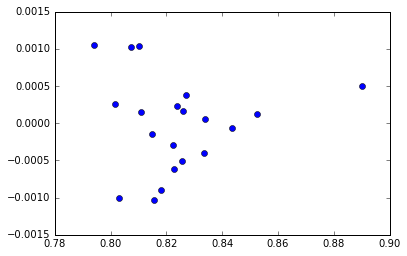

In [16]:
# repeating above steps for test file - t suffix is for test
dft = pd.read_csv('testset.csv')
X1t = 1.0/np.cos(np.radians(list(dft['catalogue_alt'])))
X2t = np.tan(np.radians(list(dft['catalogue_alt'])))
X3t = np.cos(np.radians(list(dft['catalogue_az']))) * np.tan(np.radians(list(dft['catalogue_alt'])))
X4t = np.sin(np.radians(list(dft['catalogue_az']))) * np.tan(np.radians(list(dft['catalogue_alt'])))
Xt = np.array([X1t, X2t, X3t, X4t])
Xt = Xt.T
#print(Xt.shape)
yt = np.array(dft.az_diff)
regr2 = linear_model.LinearRegression()
regr2.fit(Xt, yt)
y_predicted_test = regr2.predict(Xt)

RSS = regr2.residues_
print("RSS is : ", RSS)
RSE = np.sqrt(RSS/(41-4-1)) # RSE = sqrt(RSS/(n-p-1))
print("RSE is : ", RSE)
print("R^2 score is : ", regr2.score(Xt,yt))
TSS = np.sum(np.square(yt-np.mean(yt)))
f_stat = ((TSS-RSS)/4)/(RSS/(41-4-1))
print("F-statistic is : ", f_stat)
plt.plot(y_predicted_test, yt - y_predicted_test, 'bo')
plt.show()

In [33]:
RMS = np.sqrt(RSS)
pacc = RMS*3600 # Accuracy of azimuth in arc seconds
pacc

9.9524235734523785

In [31]:
rmsacc = np.sqrt(np.mean(np.square(y_predicted_test*np.cos(dft['catalogue_alt']))))
print(rmsacc*3600)
np.mean(np.square(y_predicted_test*np.cos(dft['catalogue_alt'])))

1864.26975608


0.26817142927844273